In [1]:
from magicgap import *

from pathlib import Path

In [3]:
M = 750 
results = {}
search_path = Path("complement_data")
for file_path in search_path.glob('*.npz'):
    with np.load(file_path) as data:
        n, d, d_s = int(data["n"]), int(data["d"]), int(data["d_s"])
        if n not in results:
            results[n] = {}
        if d not in results[n]:
            results[n][d] = {}
        if d_s not in results[n][d]:
            results[n][d][d_s] = {}
        results[n][d][d_s]["min_ase"] = data["min_ase"]
        results[n][d][d_s]["min_ase_optimal_supp"] = data["min_ase_optimal_supp"]
        results[n][d][d_s]["min_ase_fixed_supp"] = data["min_ase_fixed_supp"]
        results[n][d][d_s]["avg_ase_diff_fixed_supp"] = data["avg_ase_diff_fixed_supp"]

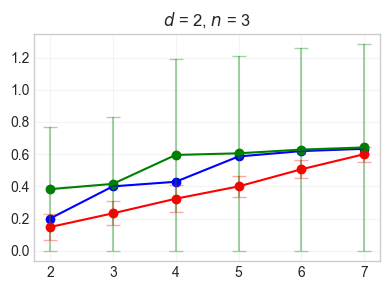

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')

n = 3
d_range = sorted(results[n].keys())
n_plots = len(d_range)
cols = n_plots
rows = math.ceil(n_plots/cols)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axes = axes.flatten() if type(axes) == np.ndarray else [axes]
for i, d in enumerate(d_range):
    d_s_range = sorted(results[n][d].keys())
    min_ase = [results[n][d][d_s]["min_ase"] for d_s in d_s_range]
    min_ase_optimal_supp = [results[n][d][d_s]["min_ase_optimal_supp"][0] for d_s in d_s_range]
    min_ase_optimal_supp_std = [results[n][d][d_s]["min_ase_optimal_supp"][1] for d_s in d_s_range]
    min_ase_fixed_supp = [results[n][d][d_s]["min_ase_fixed_supp"][0] for d_s in d_s_range]
    min_ase_fixed_supp_std = [results[n][d][d_s]["min_ase_fixed_supp"][1] for d_s in d_s_range]

    axes[i].plot(d_s_range, min_ase, color="blue", label="No support")
    axes[i].scatter(d_s_range, min_ase, color="blue")

    axes[i].errorbar(d_s_range, min_ase_optimal_supp, yerr=min_ase_optimal_supp_std, fmt='o', capsize=5, alpha=0.35, color="red")
    axes[i].plot(d_s_range, min_ase_optimal_supp, color="red", label="Optimal support")
    axes[i].scatter(d_s_range, min_ase_optimal_supp, color="red")

    axes[i].errorbar(d_s_range, min_ase_fixed_supp, yerr=min_ase_fixed_supp, fmt='o', capsize=5, alpha=0.35, color="green")
    axes[i].plot(d_s_range, min_ase_fixed_supp, color="green", label="Fixed support")
    axes[i].scatter(d_s_range, min_ase_fixed_supp, color="green")
    
    axes[i].set_title("$d$ = %d, $n$ = %d" % (d, n))
    axes[i].set_xticks(d_s_range)
    #axes[i].set_xlabel("$d_S$")
    #axes[i].set_ylabel("ASE")
    axes[i].grid(True, alpha=0.2)

    #if i == 0:
    #    axes[i].legend()

for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("img/complements_d2n3.pdf", dpi=600, bbox_inches='tight')

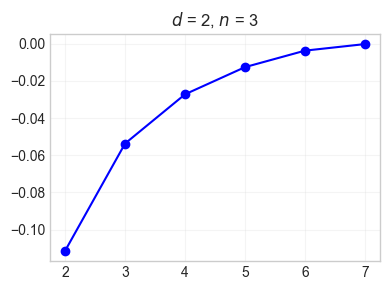

In [10]:
plt.style.use('seaborn-v0_8-whitegrid')

n = 3
d_range = sorted(results[n].keys())
n_plots = len(d_range)
cols = n_plots
rows = math.ceil(n_plots/cols)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axes = axes.flatten() if type(axes) == np.ndarray else [axes]
for i, d in enumerate(d_range):
    d_s_range = sorted(results[n][d].keys())
    avg_ase_diff_fixed_supp = [results[n][d][d_s]["avg_ase_diff_fixed_supp"] for d_s in d_s_range]

    axes[i].plot(d_s_range, avg_ase_diff_fixed_supp, color="blue")
    axes[i].scatter(d_s_range, avg_ase_diff_fixed_supp, color="blue")
    
    axes[i].set_title("$d$ = %d, $n$ = %d" % (d, n))
    axes[i].set_xticks(d_s_range)
    #axes[i].set_xlabel("$d_S$")
    #axes[i].set_ylabel("Rel. change in ASE")
    axes[i].grid(True, alpha=0.2)

for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("img/complements_rel_change_d2n3.pdf", dpi=600, bbox_inches='tight')